### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

In [1]:
# Do imports
import pandas as pd

In [2]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


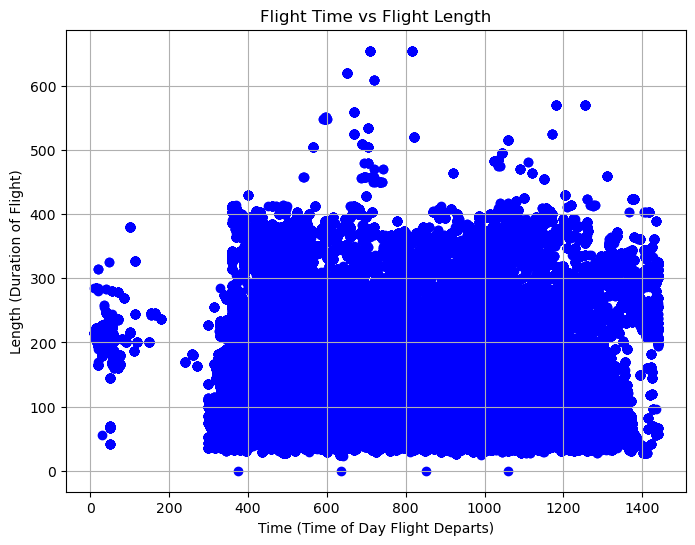

In [4]:
import matplotlib.pyplot as plt

# Plotting Time vs Length to check for linearity
plt.figure(figsize=(8, 6))
plt.scatter(df['Time'], df['Length'], color='blue')
plt.title('Flight Time vs Flight Length')
plt.xlabel('Time (Time of Day Flight Departs)')
plt.ylabel('Length (Duration of Flight)')
plt.grid(True)

# Show the plot
plt.show()


###Histogram of Flight Lengths

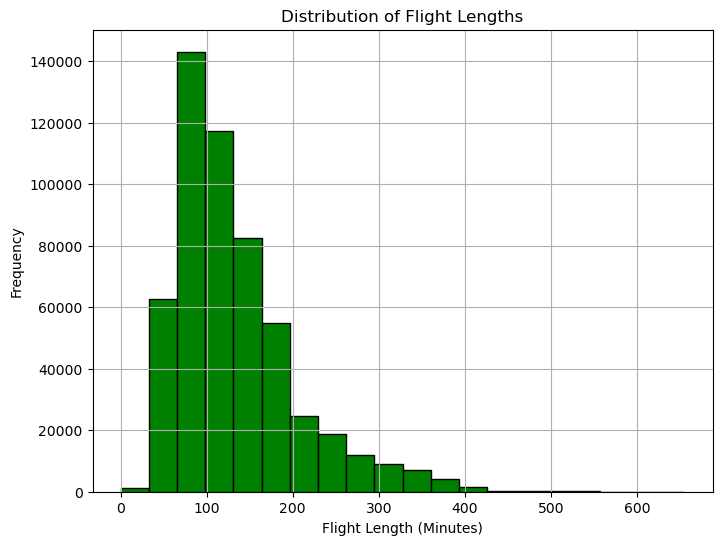

In [5]:
# Histogram for the length of flights
plt.figure(figsize=(8, 6))
plt.hist(df['Length'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Flight Lengths')
plt.xlabel('Flight Length (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


## Bar Plot of Average Flight Lengths by Day of the Week

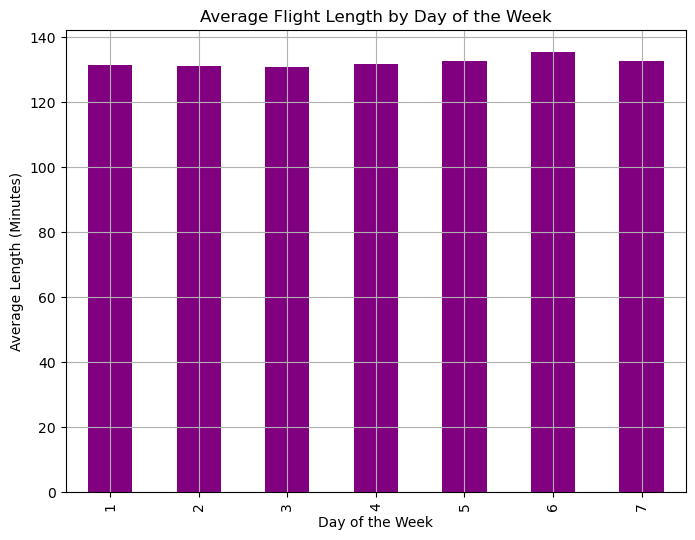

In [6]:
# Bar plot for average flight length by day of the week
avg_length_by_day = df.groupby('DayOfWeek')['Length'].mean()

plt.figure(figsize=(8, 6))
avg_length_by_day.plot(kind='bar', color='purple')
plt.title('Average Flight Length by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Length (Minutes)')
plt.grid(True)

# Show the plot
plt.show()


## Line Plot of Flight Departure Times Throughout the Day

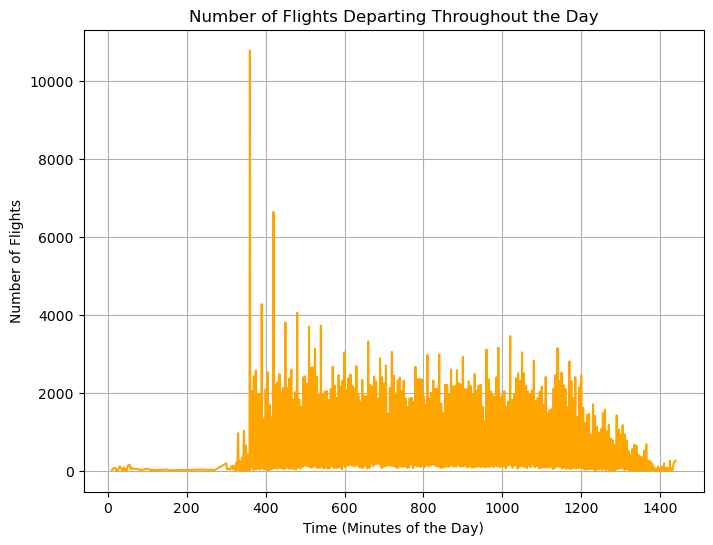

In [7]:
# Line plot for departure times throughout the day
time_count = df['Time'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
time_count.plot(kind='line', color='orange')
plt.title('Number of Flights Departing Throughout the Day')
plt.xlabel('Time (Minutes of the Day)')
plt.ylabel('Number of Flights')
plt.grid(True)

# Show the plot
plt.show()


## Scatterplot

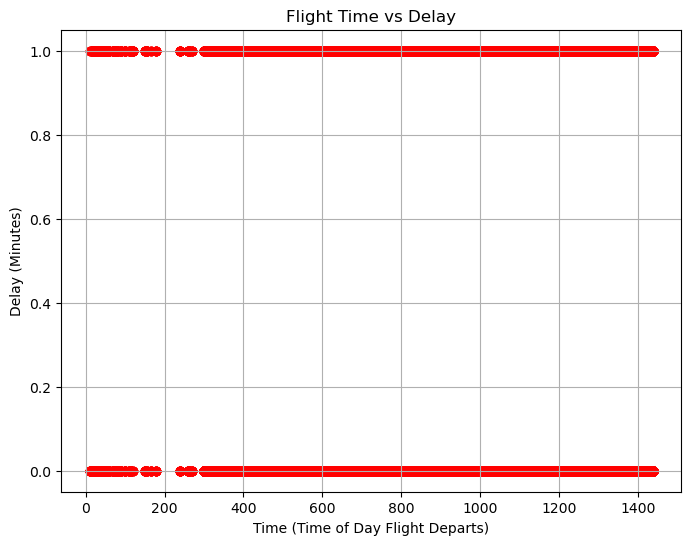

In [8]:
import matplotlib.pyplot as plt

# Scatter plot: Time of departure vs Delay
plt.figure(figsize=(8, 6))
plt.scatter(df['Time'], df['Delay'], color='red')
plt.title('Flight Time vs Delay')
plt.xlabel('Time (Time of Day Flight Departs)')
plt.ylabel('Delay (Minutes)')
plt.grid(True)

# Show the plot
plt.show()
